In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
import pandas as pd
import random
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sn
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing.image import load_img
from numpy import expand_dims
from matplotlib import pyplot
import random
from PIL import Image



In [2]:
num_of_pics = 3
num_of_augmented = 3
IMG_WIDTH = 500
pics = []
for i in range(num_of_pics):
    dir_num = random.randint(1,3)
    chosen_image = random.choice(os.listdir('D:/Data/BME/felev_5/temalab_tanulas/datasets/error_detection/' + str(dir_num)))
    img = load_img("D:/Data/BME/felev_5/temalab_tanulas/datasets/error_detection/"+str(dir_num)+"/" +chosen_image) 
    wpercent = (IMG_WIDTH/float(img.size[0]))
    IMG_HEIGHT = int((float(img.size[1])*float(wpercent)))
    img = img.resize((IMG_WIDTH, IMG_HEIGHT))
    pics.append(img)
    
def plotImages(images_arr):
    fig, axes = plt.subplots(1, num_of_augmented, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()
    


In [3]:
 gen = ImageDataGenerator(rotation_range= 45, width_shift_range = 0.1, height_shift_range  =0.1,
                        shear_range = 5.0, zoom_range = [0.8, 1.2], brightness_range = [0.8, 1.2],
                        channel_shift_range = 80, horizontal_flip = True, vertical_flip = True, fill_mode = "reflect")
            

#gen = ImageDataGenerator(zoom_range = [10.0, 20.0], fill_mode = "reflect")

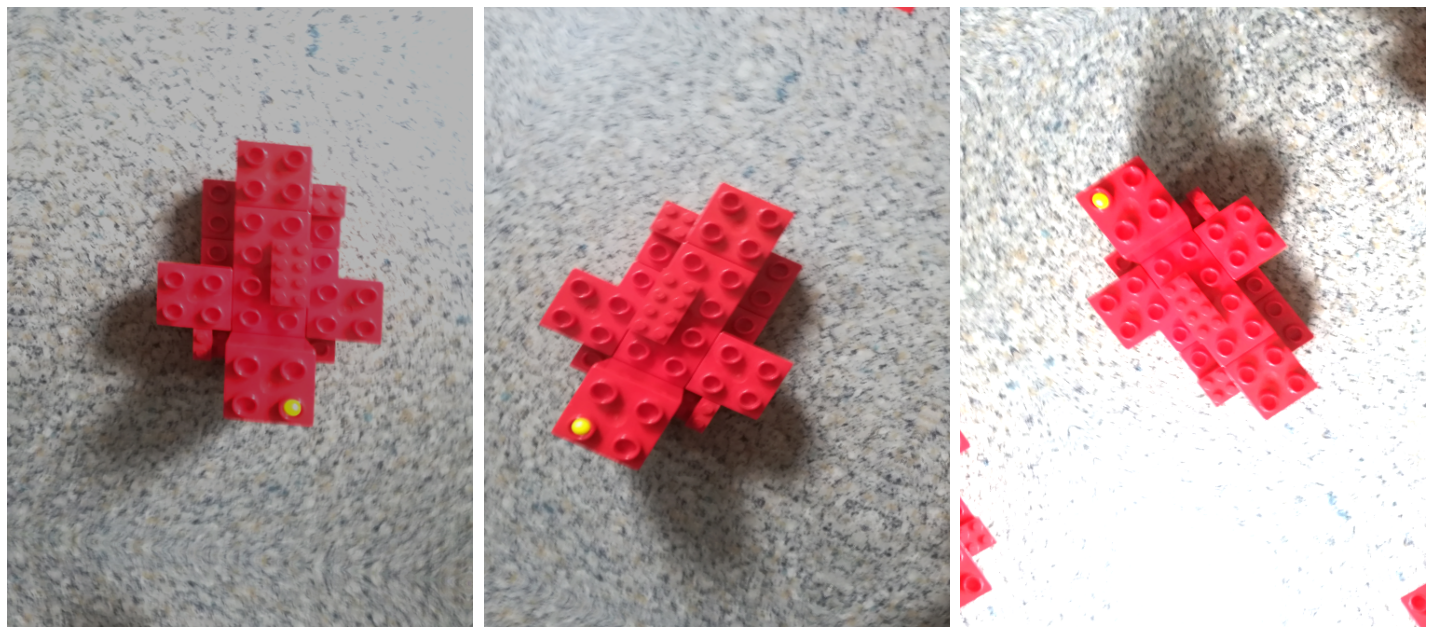

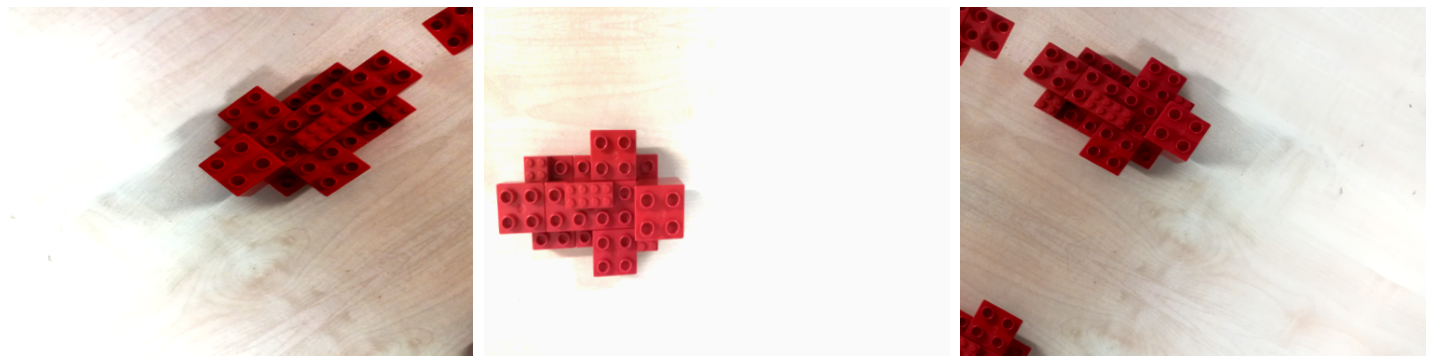

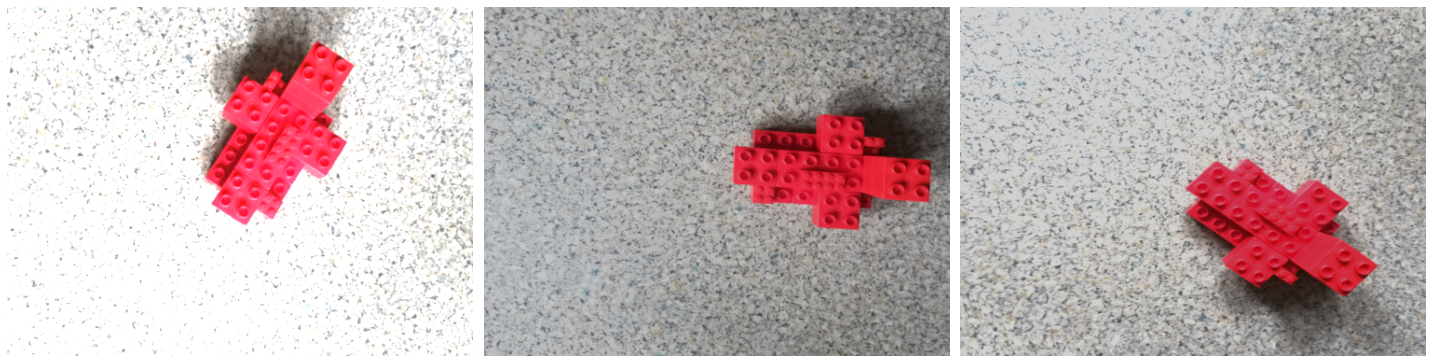

_________________Total: 9_________________


In [4]:
for img in pics:
    image = img_to_array(img)
    image = expand_dims(image, 0)
    aug_iter = gen.flow(image)
    aug_images = [next(aug_iter)[0].astype(np.uint8) for i in range(num_of_augmented)]


    plotImages(aug_images)
    
print(f"_________________Total: {num_of_pics*num_of_augmented}_________________")

